In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Phonation Mode KNN Classification

This classification is just for 2 phonation modes (for the partciipant used for building this model) and might need extending based on the participant used. This would also require labelleing unlabelled participants phonation modes.

Using multilayer perceptron model could prove better for more complex classification tasks. Used in Furkan thesis/paper in phonation mode classification. However, since phonation is only using 2 classes, the MLP is forth developed for the recording condition classification task.

As the phonation classification for this is simply a 2 way classification task, a KNN should be sufficient for the task. Therefore it is the forst thing tested. However, of course should the phonation modes supported increase, then the classification task would become more complex and using a simple KNN would liekly not suffice.

In [56]:
from scripts.knn_classifier import train_and_test_knn, evaluate_model
from scripts.utils import plot_confusion_matrix, calculate_metrics_2_class
DATA_FILE = 'data/voice_data_thesis_preprocessed.csv'

## 1. Complete data

Accuracy:  0.9852
Returned F1 score:  0.9853
Precision:  0.9817
Recall:  0.9877
Specificity:  0.983
False positive rate:  0.017


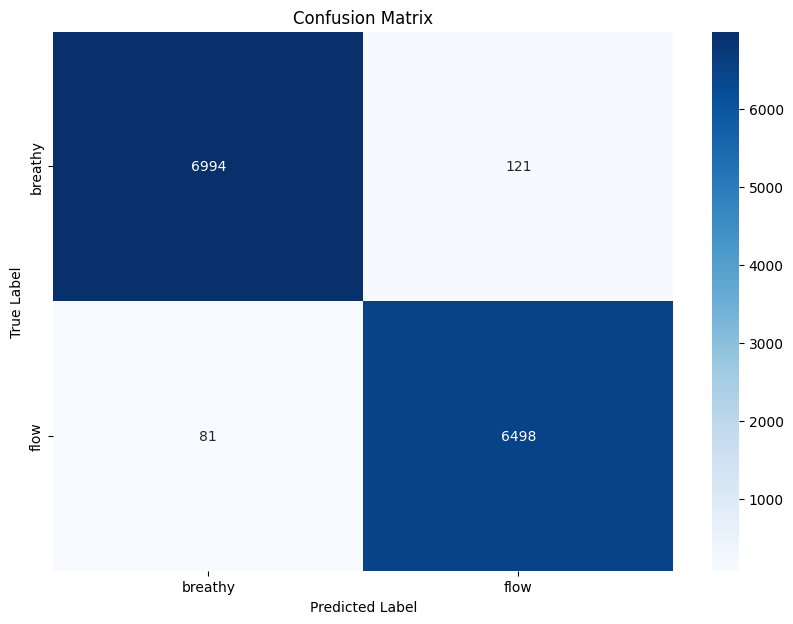

In [57]:
# Train and test the model -- dont drop any columns all modalities
y_test, y_pred, class_names = train_and_test_knn(DATA_FILE, classify='phonation', audio_source='computer')
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)

precision, recall, specificity, fpr = calculate_metrics_2_class(conf_matrix)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))
print("Specificity: ", round(specificity, 4))
print("False positive rate: ", round(fpr, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)


#### Top 5 features only

Selected features:  Index(['computer_mfcc_1', 'computer_mfcc_3', 'computer_pose_landmark_13_y',
       'computer_pose_landmark_24_z', 'computer_pose_landmark_25_z'],
      dtype='object')
Accuracy:  0.8079
Returned F1 score:  0.808
Precision:  0.7784
Recall:  0.8392
Specificity:  0.7791
False positive rate:  0.2209


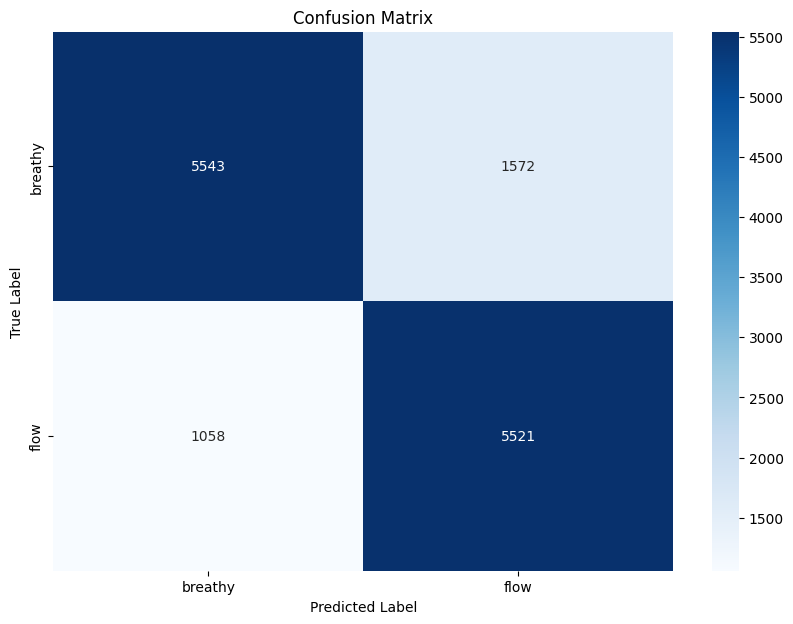

In [40]:
y_test, y_pred, class_names = train_and_test_knn(DATA_FILE, classify='phonation', audio_source='computer', num_features=5)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)

precision, recall, specificity, fpr = calculate_metrics_2_class(conf_matrix)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))
print("Specificity: ", round(specificity, 4))
print("False positive rate: ", round(fpr, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)

The automatic feature selection is not robust enough, because it doesn't understand the data. Unfortunately the positioning of the camera for the two phonation conditions is slightly different, meaning that the lower limb points are or are not visible more depending on thephonation mode condition. 

Therefore, feature selection must be done after disregarding the lower 

## 2. Audio Only

In [41]:
modalities = [
    "audio"
]

#### All audio features

Accuracy:  0.8634
Returned F1 score:  0.8634
Precision:  0.8576
Recall:  0.8583
Specificity:  0.8682
False positive rate:  0.1318


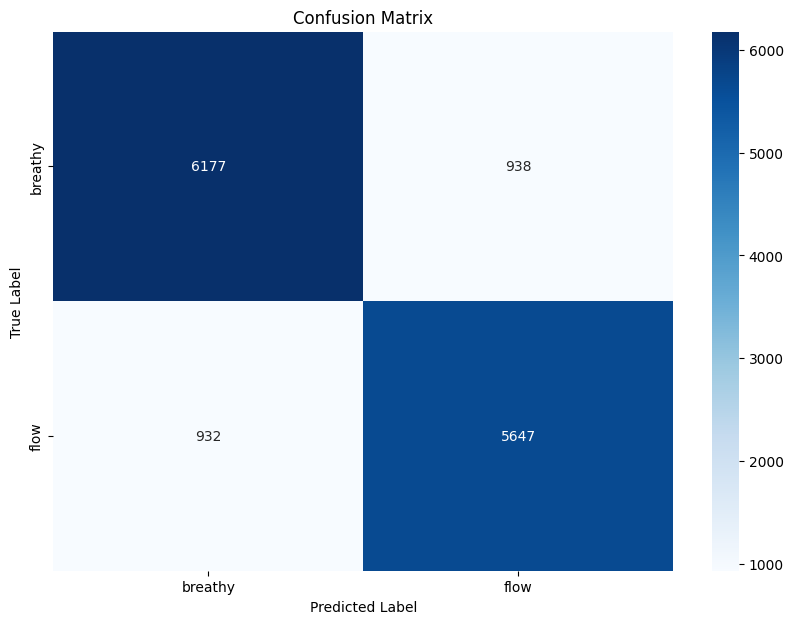

In [42]:
y_test, y_pred, class_names = train_and_test_knn(DATA_FILE, classify='phonation', audio_source='computer', modalities=modalities)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)

precision, recall, specificity, fpr = calculate_metrics_2_class(conf_matrix)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))
print("Specificity: ", round(specificity, 4))
print("False positive rate: ", round(fpr, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)

#### Top 5 audio features

Selected features:  Index(['computer_rms_energy', 'computer_spec_slope', 'computer_spec_decr',
       'computer_mfcc_1', 'computer_mfcc_3'],
      dtype='object')
Accuracy:  0.8071
Returned F1 score:  0.8072
Precision:  0.7776
Recall:  0.8383
Specificity:  0.7784
False positive rate:  0.2216


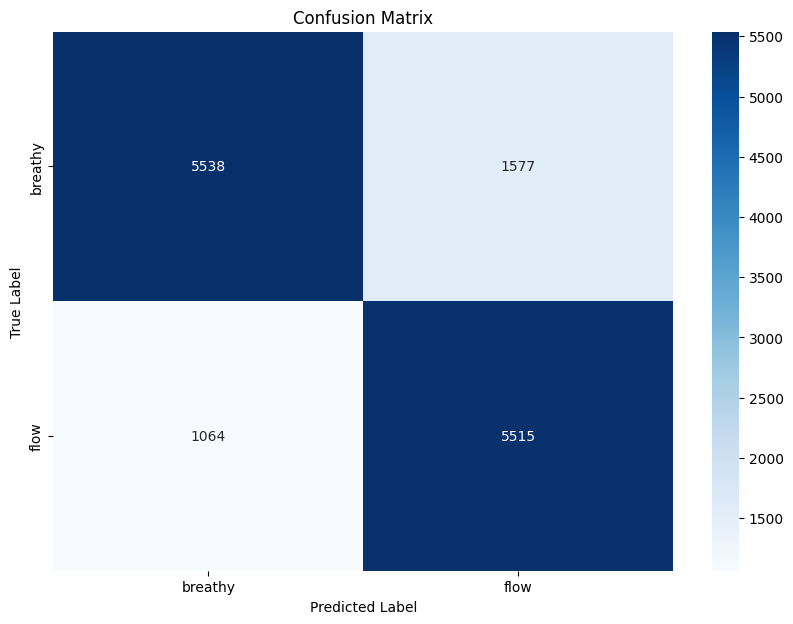

In [43]:
y_test, y_pred, class_names = train_and_test_knn(DATA_FILE, classify='phonation', audio_source='computer', num_features=5, modalities=modalities)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)

precision, recall, specificity, fpr = calculate_metrics_2_class(conf_matrix)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))
print("Specificity: ", round(specificity, 4))
print("False positive rate: ", round(fpr, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)

## 3. Video Only

In [44]:
modalities = [
    "video"
]

Accuracy:  1.0
Returned F1 score:  1.0
Precision:  1.0
Recall:  1.0
Specificity:  1.0
False positive rate:  0.0


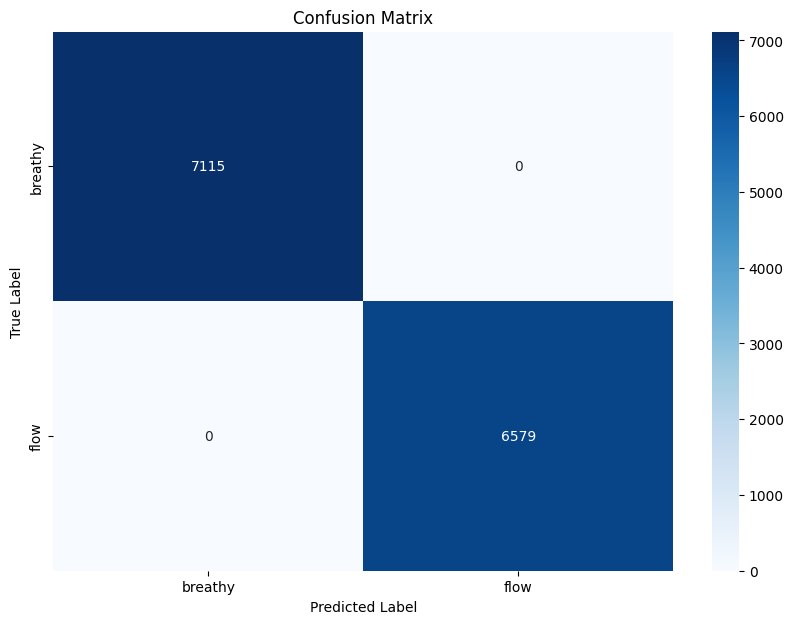

In [45]:
y_test, y_pred, class_names = train_and_test_knn(DATA_FILE, classify='phonation', audio_source='computer', modalities=modalities)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)

precision, recall, specificity, fpr = calculate_metrics_2_class(conf_matrix)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))
print("Specificity: ", round(specificity, 4))
print("False positive rate: ", round(fpr, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)

#### Top 5 video features

Selected features:  Index(['computer_pose_landmark_10_y', 'computer_pose_landmark_11_y',
       'computer_pose_landmark_13_y', 'computer_pose_landmark_24_z',
       'computer_pose_landmark_25_z'],
      dtype='object')
Accuracy:  1.0
Returned F1 score:  1.0
Precision:  1.0
Recall:  1.0
Specificity:  1.0
False positive rate:  0.0


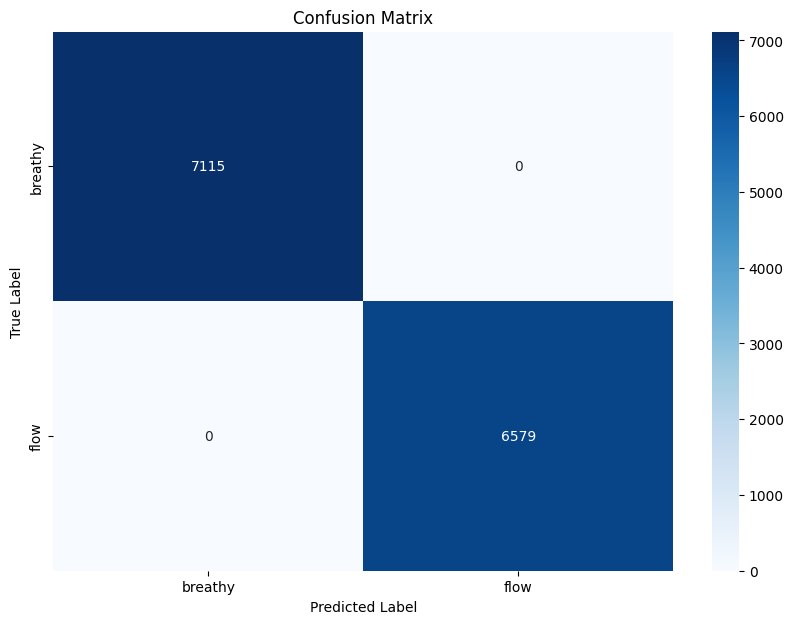

In [46]:
y_test, y_pred, class_names = train_and_test_knn(DATA_FILE, classify='phonation', num_features=5, audio_source='computer', modalities=modalities)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)

precision, recall, specificity, fpr = calculate_metrics_2_class(conf_matrix)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))
print("Specificity: ", round(specificity, 4))
print("False positive rate: ", round(fpr, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)

## 4. Biosignal Data Only

In [47]:
modalities = [
    "biosignals"
]

Accuracy:  0.9971
Returned F1 score:  0.9971
Precision:  0.9964
Recall:  0.9976
Specificity:  0.9966
False positive rate:  0.0034


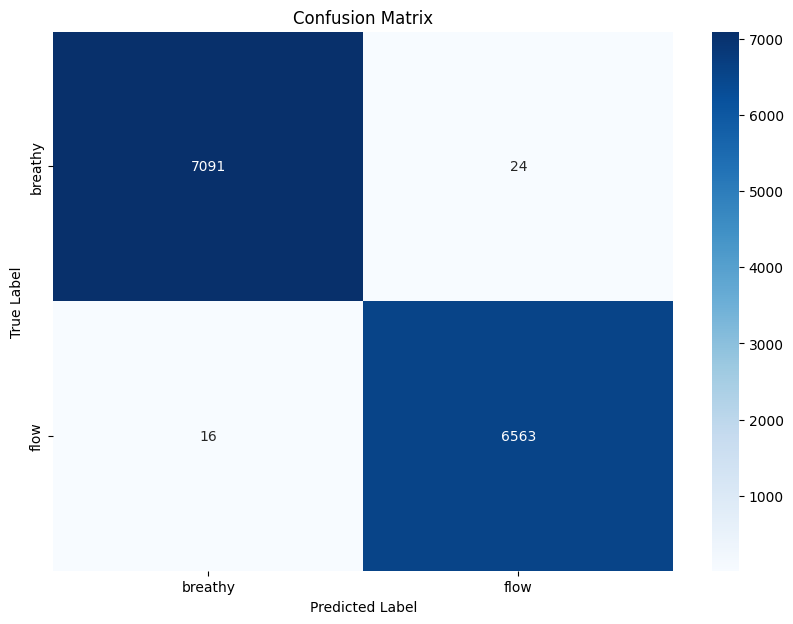

In [48]:
y_test, y_pred, class_names = train_and_test_knn(DATA_FILE, classify='phonation', audio_source='computer', modalities=modalities)
accuracy, f1, conf_matrix = evaluate_model(y_test, y_pred)

precision, recall, specificity, fpr = calculate_metrics_2_class(conf_matrix)

print("Accuracy: ", round(accuracy, 4))
print("Returned F1 score: ", round(f1, 4))
print("Precision: ", round(precision, 4))
print("Recall: ", round(recall, 4))
print("Specificity: ", round(specificity, 4))
print("False positive rate: ", round(fpr, 4))

plot_confusion_matrix(conf_matrix, class_names=class_names)